<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/Pro_%D0%A1%D0%B0%D1%84%D0%BE%D0%BD%D0%BE%D0%B2_%D0%A6%D0%B5%D0%BB%D1%8C_%3D_90_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B1%D0%B0%D0%B7%D0%B0_%D0%9C%D0%98%D0%9D%D0%AB_%D0%BD%D0%B0_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B9_%D0%B2%D1%8B%D0%B1%D0%BE%D0%BA%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача регрессии. Цель определиение = 90 % точности база МИНЫ на тестовой выбоке по датчикам.





In [ ]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline


##Загрузка файла

In [ ]:
# Загружаем файлы
files.upload()
!ls # Выводим содержимое корневой папки

Saving sonar.csv to sonar.csv
sample_data  sonar.csv


## Загрузка данных

In [ ]:
# Загружаем данные из файла sonar.csv
df = pd.read_csv("sonar.csv", header=None)   # header=None, когда данные не имеют строки с заголовками
df.head()                                    # Выводим первые 5 строк наших данных

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
print(df.shape) # Размерность данных

(208, 61)


In [ ]:
dataset = df.values                 # Берем только значения массива(без индексов)
X = dataset[:,0:60].astype(float)   # Присваиваем им тип данных - float(с плавающей точкой) данным с 0 по 60 колонки
Y = dataset[:,60]                   # Присваеваем значению Y данные из столбца с индексом 60
Y[Y=='R']='0'                       # Если значение элемента столбца равно 'R', присваеваем ему значение '0'
Y[Y=='M']='1'                       # Если значение элемента столбца равно 'Y', присваеваем ему значение '1'
Y = Y.astype(int)                   # Меняем тип данных столбца на 'int'(целочисленный тип данных)
print(X.shape)                      # Выводим размерность X
print(Y.shape)                      # Выводим размерность Y
print(Y)                            

(208, 60)
(208,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Создание обучающей, проверочной и тестовой выборки

In [ ]:
# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделяния на обучающую и проверочныю/тестовую выбрку
from sklearn.model_selection import train_test_split

# test_size=0.2 - будет выделено 20% от тренировочных данных 
# shuffle=True - перемешать данные
# x_train - данные для обучения
# x_test - данные для проверки
# y_train - правильные ответы для обучения
# y_test - правильные ответы для проверки
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)    
print('Обучающая =',x_train.shape, 'Тестовая выборка =',x_test.shape)

Обучающая = (166, 60) Тестовая выборка = (42, 60)


## Создание нейронной сети

Epoch 1/200
17/17 [==============================] - 0s 20ms/step - loss: 0.8421 - accuracy: 0.5783 - val_loss: 1.7172 - val_accuracy: 0.3824
Epoch 2/200
17/17 [==============================] - 0s 10ms/step - loss: 0.6811 - accuracy: 0.6325 - val_loss: 1.5334 - val_accuracy: 0.3824
Epoch 3/200
17/17 [==============================] - 0s 10ms/step - loss: 0.7024 - accuracy: 0.6145 - val_loss: 1.4543 - val_accuracy: 0.3824
Epoch 4/200
17/17 [==============================] - 0s 11ms/step - loss: 0.6734 - accuracy: 0.6807 - val_loss: 1.1974 - val_accuracy: 0.4118
Epoch 5/200
17/17 [==============================] - 0s 11ms/step - loss: 0.7049 - accuracy: 0.6265 - val_loss: 0.6770 - val_accuracy: 0.6471
Epoch 6/200
17/17 [==============================] - 0s 11ms/step - loss: 0.5890 - accuracy: 0.7711 - val_loss: 0.6645 - val_accuracy: 0.6176
Epoch 7/200
17/17 [==============================] - 0s 10ms/step - loss: 0.5787 - accuracy: 0.7590 - val_loss: 0.7378 - val_accuracy: 0.5882
Epoch 

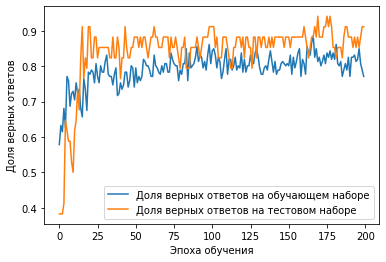

In [ ]:
# Функция пересоздаёт пустую сеть
def createModel():

  # Создаем сеть
  model = Sequential()
  # Добавляем слои
  model.add(Dense(6000, input_dim=60, activation = 'tanh' ))
  model.add(Dropout(0.6))
 
  model.add(BatchNormalization())

  model.add(Dense(3000,  activation = 'tanh' ))
  model.add(Dropout(0.6))
  
  model.add(Dense(4000, activation = 'tanh' ))
  model.add(Dropout(0.4))
  model.add(BatchNormalization())
  
  model.add(Dense(40, activation = 'tanh' ))
  model.add(Dropout(0.4))
  
  model.add(Dense(10, activation = 'tanh' ))
  model.add(Dropout(0.4))
   

  model.add(Dense(1, activation='sigmoid'))

  # Компилируем сеть
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
  return model # Возвращаем созданную сеть

# Создаём пустую сеть
model = createModel()
result= model.fit(x_train, 
          y_train, 
          batch_size=10, 
          epochs=200,
          validation_data=(x_val, y_val), # Указываем проверочную выборку
          verbose=1)

plt.plot(result.history['accuracy'],
         label='Доля верных ответов на обучающем наборе'
         )


plt.plot(result.history['val_accuracy'],
         label='Доля верных ответов на тестовом наборе'
         )





# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()

plt.show()


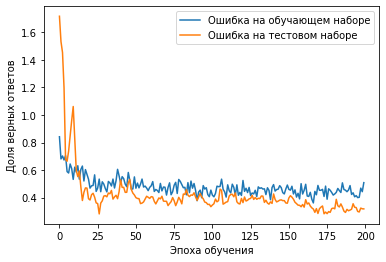

In [ ]:
plt.plot(result.history['loss'],
         label='Ошибка на обучающем наборе'
         )


plt.plot(result.history['val_loss'],
         label='Ошибка на тестовом наборе'
         )





# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()

plt.show()


Итого : на тестовой выборке достигнута точнить в 91%. val_accuracy: 0.9118 Переобучения нет.